In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Loaded 3725 images for label 'with_mask'
Loaded 3828 images for label 'without_mask'


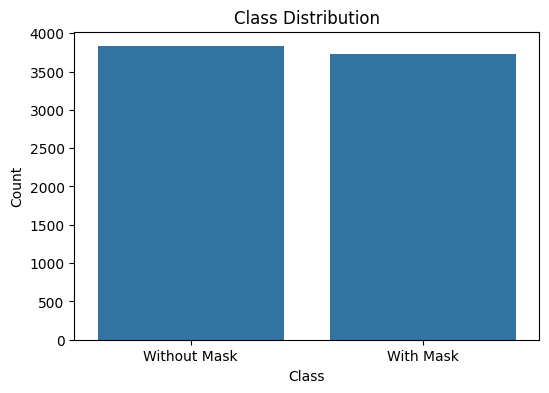

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training ResNet152V2...
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 61s 200ms/step - accuracy: 0.9644 - loss: 0.1480 - val_accuracy: 0.9884 - val_loss: 0.0420
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 51s 73ms/step - accuracy: 0.9917 - loss: 0.0270 - val_accuracy: 0.9818 - val_loss: 0.0486
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 73ms/step - accuracy: 0.9949 - loss: 0.0126 - val_accuracy: 0.9884 - val_loss: 0.0441
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 0.9883 - loss: 0.0415
ResNet152V2 Test Accuracy: 0.99

Confusion Matrix for ResNet152V2:
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 227ms/step


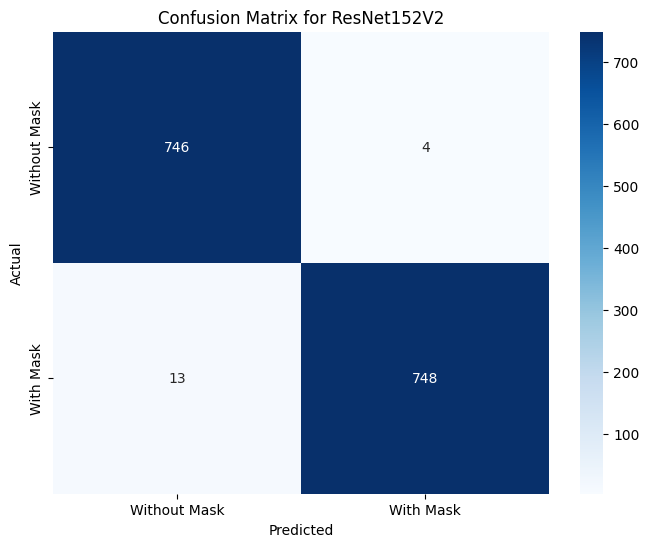

Training InceptionV3...
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 40s 146ms/step - accuracy: 0.9270 - loss: 0.2918 - val_accuracy: 0.9752 - val_loss: 0.0664
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9834 - loss: 0.0473 - val_accuracy: 0.9785 - val_loss: 0.0624
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9841 - loss: 0.0449 - val_accuracy: 0.9752 - val_loss: 0.0740
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9898 - loss: 0.0384 - val_accuracy: 0.9868 - val_loss: 0.0532
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9851 - val_loss: 0.0542
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.9943 - loss: 0.0201 - val_accuracy: 0.9736 - val_loss: 0.0894
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.9813 - loss: 0.0719
InceptionV3 Test Accuracy: 0.98

Confusion Matrix for InceptionV3:
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 129ms/step


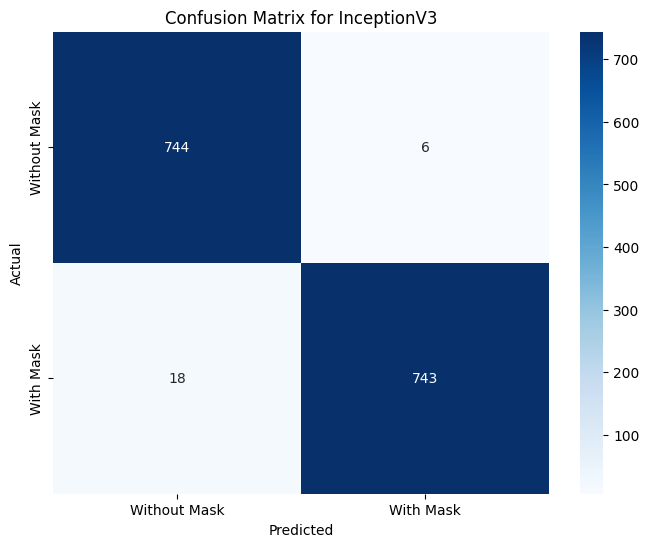

Training MobileNetV2...
Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 24s 82ms/step - accuracy: 0.9286 - loss: 0.2128 - val_accuracy: 0.9669 - val_loss: 0.0974
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9852 - loss: 0.0376 - val_accuracy: 0.9752 - val_loss: 0.0563
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9959 - loss: 0.0150 - val_accuracy: 0.9769 - val_loss: 0.0826
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9965 - loss: 0.0098 - val_accuracy: 0.9785 - val_loss: 0.0614
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.9864 - loss: 0.0366
MobileNetV2 Test Accuracy: 0.99

Confusion Matrix for MobileNetV2:
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step


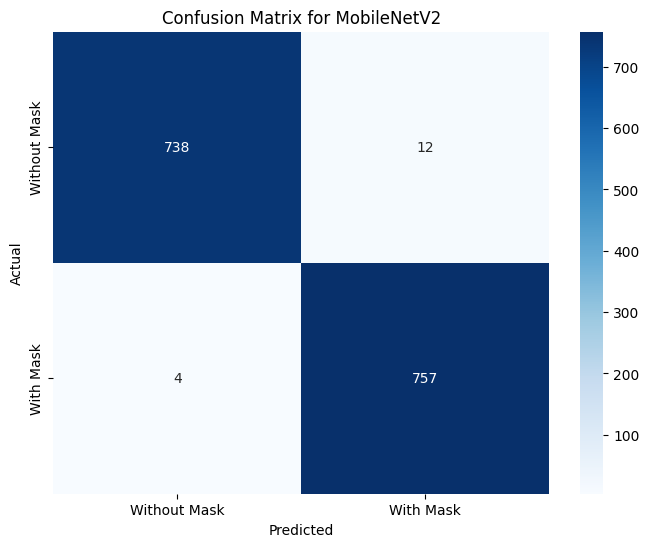


Best Model: MobileNetV2 with Accuracy: 0.99
The best model was chosen based on its higher test accuracy and better performance across the confusion matrix.


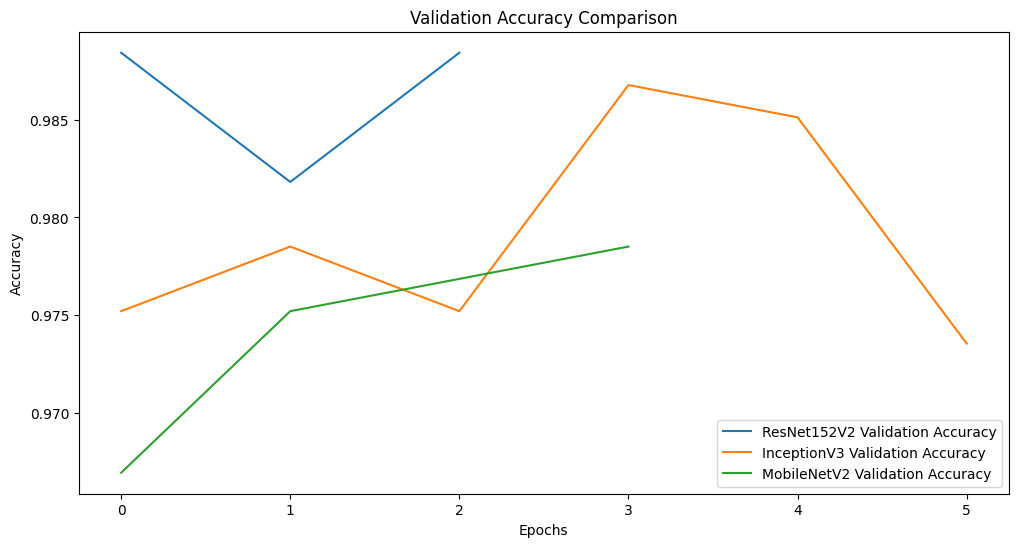

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Prediction: With Mask with confidence 1.00


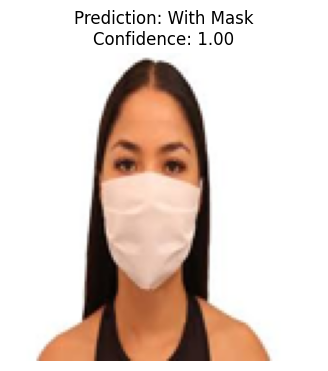

In [3]:
# Import required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Load Images and Display Statistics
def load_images(folder, label):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img = Image.open(file_path)
            img = img.resize((128, 128)).convert('RGB')
            images.append(np.array(img))
    print(f"Loaded {len(images)} images for label '{label}'")
    return images

# 2. Prepare Dataset
def prepare_dataset(with_mask_path, without_mask_path):
    with_mask_images = load_images(with_mask_path, "with_mask")
    without_mask_images = load_images(without_mask_path, "without_mask")

    # Combine and label the data
    X = np.array(with_mask_images + without_mask_images)
    Y = np.array([1] * len(with_mask_images) + [0] * len(without_mask_images))

    # Plot class distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x=Y)
    plt.xticks([0, 1], ["Without Mask", "With Mask"])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

    return X, Y

# 3. Split Dataset
def split_dataset(X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    X_train = X_train / 255.0  # Normalize pixel values
    X_test = X_test / 255.0
    return X_train, X_test, Y_train, Y_test

# 4. Train Model with a Given Base Model
def train_model(base_model, X_train, Y_train, X_test, Y_test, model_name):
    base_model.trainable = False

    # Add custom layers
    inputs = Input(shape=(128, 128, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(2, activation='softmax')(x)
    model = Model(inputs, outputs)

    model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    print(f"Training {model_name}...")

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

    history = model.fit(
        X_train, Y_train,
        epochs=10,
        validation_split=0.1,
        callbacks=[early_stopping]
    )

    # Evaluate model
    loss, accuracy = model.evaluate(X_test, Y_test)
    print(f"{model_name} Test Accuracy: {accuracy:.2f}")

    return model, accuracy, history

# 5. Plot Confusion Matrix
def plot_confusion_matrix(model, X_test, Y_test, model_name):
    Y_pred = np.argmax(model.predict(X_test), axis=1)
    cm = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Without Mask", "With Mask"], yticklabels=["Without Mask", "With Mask"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# 6. Plot Training History
def plot_training_history(histories):
    plt.figure(figsize=(12, 6))
    for model_name, history in histories.items():
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 7. Predict a Single Image
def predict_image(model, image_path):
    """
    Predicts whether a person in the image is wearing a mask or not and displays the image.
    """
    # Load and preprocess the image
    img = Image.open(image_path).resize((128, 128)).convert('RGB')
    img_array = np.expand_dims(np.array(img) / 255.0, axis=0)

    # Make the prediction
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    confidence = prediction[0][class_idx]
    class_names = ["Without Mask", "With Mask"]

    # Print prediction results
    print(f"Prediction: {class_names[class_idx]} with confidence {confidence:.2f}")

    # Display the image
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {class_names[class_idx]}\nConfidence: {confidence:.2f}")
    plt.show()


# Main Execution
if __name__ == "__main__":
    # Paths to datasets
    with_mask_path = '/content/drive/My Drive/data/with_mask'
    without_mask_path = '/content/drive/My Drive/data/without_mask'

    # Prepare dataset
    X, Y = prepare_dataset(with_mask_path, without_mask_path)
    X_train, X_test, Y_train, Y_test = split_dataset(X, Y)

    # Train and compare models
    models = {
        "ResNet152V2": tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
        "InceptionV3": tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3)),
        "MobileNetV2": tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    }

    best_model = None
    best_accuracy = 0
    best_model_name = ""
    histories = {}

    for model_name, base_model in models.items():
        model, accuracy, history = train_model(base_model, X_train, Y_train, X_test, Y_test, model_name)
        histories[model_name] = history
        print(f"\nConfusion Matrix for {model_name}:")
        plot_confusion_matrix(model, X_test, Y_test, model_name)

        if accuracy > best_accuracy:
            best_model = model
            best_accuracy = accuracy
            best_model_name = model_name

    print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.2f}")
    print(f"The best model was chosen based on its higher test accuracy and better performance across the confusion matrix.")

    # Plot model comparison
    plot_training_history(histories)

    # Test a single image with the best model
    test_image_path = "/content/with_mask_3722.jpg"
    predict_image(best_model, test_image_path)
